In [ ]:
!pip install import-ipynb

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
import matplotlib.pyplot as plt 
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.merge import concatenate 
from keras.layers import Flatten 
from google.colab import drive
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier,KerasRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
drive.mount('/content/drive')
%cd "/content/drive/My Drive/Colab Notebooks"
import import_ipynb
from model_functions import *

Using TensorFlow backend.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks
importing Jupyter notebook from model_functions.ipynb


In [ ]:

data = np.load('/content/drive/My Drive/ready_data_6C/matrix_input/1.npy') 
label = np.load('/content/drive/My Drive/ready_data_6C/output/output.npy')

print(data.shape)

(96, 6, 116, 116)


In [ ]:
def compress():  # 将 6个hz频道 变成3个 频道
  L =[]

  for i in range(96):
    a= 0
    b = 0
    c = 0
    New = []
    for j in range(0,2):
      a = a + data[i,j,:,:]
    a = a/2
    for j in range(2,4):
      b = b + data[i,j,:,:]
    b = b/2
    for j in range(4,6):
      c = c + data[i,j,:,:]
    c = c/2
    New.append(a)
    New.append(b)
    New.append(c)
    L.append(New)
  L = np.array(L)

  return L

A = compress()



In [ ]:
print(data.shape)
print(label.shape)
print(A.shape)
A = np.reshape(A, (96,116,116,3)) #变成 length,width, cns 标准 3d图像
print(A.shape)

(96, 6, 116, 116)
(96, 3)
(96, 3, 116, 116)
(96, 116, 116, 3)


In [ ]:
data, label = shuffle(data, label)
split = 72
train_data = data[:split]
train_label = label[:split]
test_data = data[split:]
test_label = label[split:]
train_data1 = A[:split]
test_data1 = A[split:]

In [ ]:
model1 = get_model4()
model2 = get_model5()
# model3 = get_model6()
# model1.summary()
# model2.summary()
# model3.summary()

In [ ]:
history1 = model1.fit(train_data, train_label, epochs = 100, verbose=0)
history2 = model2.fit(train_data, train_label, epochs = 100, verbose=0)
# history3 = model3.fit(train_data1, train_label, epochs = 10, verbose=0)

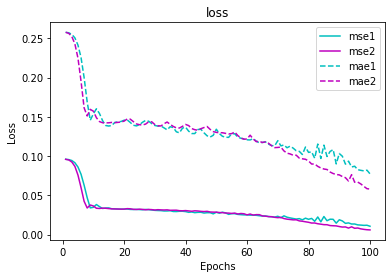

In [ ]:
mse1 = history1.history['loss']
mse2 = history2.history['loss']
mae1 = history1.history['mean_absolute_error']
mae2 = history2.history['mean_absolute_error']
# val_loss = history.history['val_loss']
# acc = history.history['acc']
# val_acc=history.history['val_acc']
epochs = range(1,len(mse1) +1)
plt.plot(epochs, mse1, 'c', label='mse1')
plt.plot(epochs, mse2, 'm', label='mse2')
plt.plot(epochs, mae1, 'c--', label='mae1')
plt.plot(epochs, mae2, 'm--', label='mae2')
plt.title('loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show() 

In [ ]:
comparision1 = model1.predict(test_data)
comparision2 =model2.predict(test_data)


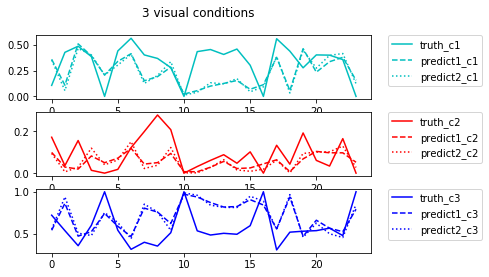

In [ ]:
x_data = range(24)
y_data_c1 = test_label[:,0]
y_data_c2 = test_label[:,1]
y_data_c3 = test_label[:,2]
y_predict1_c1 = comparision1[:,0]
y_predict1_c2 = comparision1[:,1]
y_predict1_c3 = comparision1[:,2]
y_predict2_c1 = comparision2[:,0]
y_predict2_c2 = comparision2[:,1]
y_predict2_c3 = comparision2[:,2]

fig, (predict_c1, predict_c2, predict_c3) = plt.subplots(3)
fig.suptitle('3 visual conditions') 


predict_c1.plot(x_data, y_data_c1 , 'c', label='truth_c1')
predict_c2.plot(x_data, y_data_c2 , 'r', label='truth_c2')
predict_c3.plot(x_data, y_data_c3 , 'b', label='truth_c3')
predict_c1.plot(x_data, y_predict1_c1 , 'c--', label='predict1_c1')
predict_c2.plot(x_data, y_predict1_c2 , 'r--', label='predict1_c2')
predict_c3.plot(x_data, y_predict1_c3 , 'b--', label='predict1_c3')
predict_c1.plot(x_data, y_predict2_c1 , 'c:', label='predict2_c1')
predict_c2.plot(x_data, y_predict2_c2 , 'r:', label='predict2_c2')
predict_c3.plot(x_data, y_predict2_c3 , 'b:', label='predict2_c3')

predict_c1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
predict_c2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
predict_c3.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# plt.title('loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.show() 
fig.savefig('/content/drive/My Drive/ready_data_6C/matrix_input/1.png' ,bbox_inches='tight')

In [ ]:
print(comparision1.shape)
y_data_c1 = test_label[:,0]
print(y_data_c1.shape)

(24, 3)
(24,)


In [ ]:
def calculate_mse(predict):   #对比三种视觉情况 每个model的mse  
  y_data_c1 = test_label[:,0]
  y_data_c2 = test_label[:,1]
  y_data_c3 = test_label[:,2]
  y_predict1_c1 = predict[:,0]
  y_predict1_c2 = predict[:,1]
  y_predict1_c3 = predict[:,2]
  tmp1 = 0
  tmp2 = 0
  tmp3 = 0
  for i in range(24):
    tmp1 = tmp1 + (y_data_c1[i]- y_predict1_c1[i])**2
    tmp2 = tmp2 + (y_data_c2[i]- y_predict1_c2[i])**2
    tmp3 = tmp3 + (y_data_c3[i]- y_predict1_c3[i])**2
  c1 = tmp1 /24 
  c2 = tmp2 /24
  c3 = tmp3 /24
  # c1 = K.mean(K.square( y_data_c1- y_predict1_c1), axis=-1)
  # c2 = K.mean(K.square( y_data_c2- y_predict1_c2), axis=-1)
  # c3 = K.mean(K.square( y_data_c3- y_predict1_c3), axis=-1)
  return c1 , c2 ,c3 


In [ ]:
# from keras import backend as K
Model1 = calculate_mse(comparision1)
Model2 = calculate_mse(comparision2)

In [ ]:
print(Model1)
print(Model2)

(0.04622297187687762, 0.007082256850881958, 0.06370936894601918)
(0.04765147772947598, 0.007218520456619238, 0.06742282941295046)
